# The Vanishing Gradient and Exploding Gradients Problem

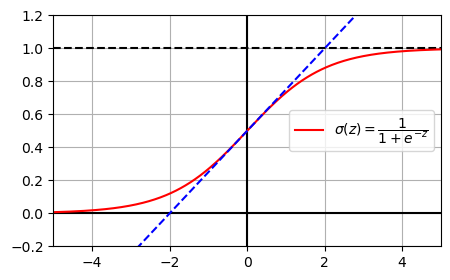

In [2]:
import numpy as np 
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1/(1+np.exp(-z))

z=np.linspace(-5,5,400)

plt.figure(figsize=(5,3))
plt.plot([-5,5],[0,0],"k-")
plt.plot([-5,5],[1,1],"k--")
plt.plot([0,0],[-0.2,1.2],"k-")
plt.plot(z,sigmoid(z),"r",label=r"$\sigma(z) = \dfrac{1}{1+e^{-z}}$")
plt.plot([-5,5],[-3/4,7/4],"b--")
plt.axis([-5,5,-0.2,1.2])
plt.legend()
plt.grid()
plt.show()

## Xavier and He Initialization

In [4]:
import tensorflow as tf

dense=tf.keras.layers.Dense(50,activation="relu",kernel_initializer="he_normal")

In [5]:
he_avg_init=tf.keras.initializers.VarianceScaling(scale=2,mode="fan_avg",distribution="uniform")
dense=tf.keras.layers.Dense(50,activation="relu",kernel_initializer=he_avg_init)

## Non-saturating Activation Functions

### ReLU

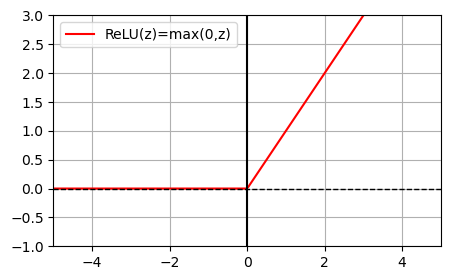

In [8]:
def relu(z):
    return np.maximum(0,z)
z=np.linspace(-5,5,200)

plt.figure(figsize=(5,3))
plt.plot(z,relu(z),"r-",label="ReLU(z)=max(0,z)")
plt.axis([-5,5,-1,3])
plt.plot([-5,5],[0,0],"k--",linewidth=1)
plt.plot([0,0],[-1,3],"k-")
plt.legend()
plt.grid()
plt.show()


### Leaky ReLU

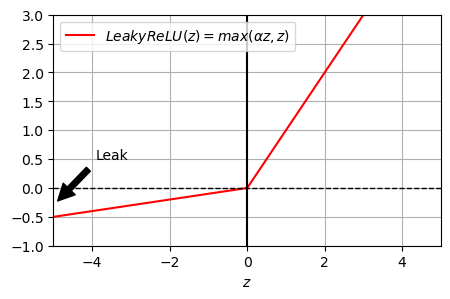

In [10]:
def leaky_relu(z,alpha):
    return np.maximum(alpha*z,z)

z=np.linspace(-5,5,200)

plt.figure(figsize=(5,3))
plt.plot(z,leaky_relu(z,0.1),"r-",label=r"$LeakyReLU(z)=max(\alpha z,z)$")
plt.axis([-5,5,-1,3])
plt.plot([-5,5],[0,0],"k--",linewidth=1)
plt.plot([0,0],[-1,3],"k-")
plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.3), arrowprops=dict(color="black",shrink=0.1),
             fontsize=10, ha="center")
plt.xlabel("$z$")
plt.legend()
plt.grid()
plt.show()


In [11]:
leaky_relu=tf.keras.layers.LeakyReLU(negative_slope=0.2)
dense=tf.keras.layers.Dense(100,activation=leaky_relu,kernel_initializer="he_normal")

In [12]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(100,kernel_initializer="he_normal"),
    tf.keras.layers.LeakyReLU(negative_slope=0.1)
])

### ELU

In [14]:
dense=tf.keras.layers.Dense(200,activation="elu",
                           kernel_initializer="he_normal")

### SELU

In [16]:
dense=tf.keras.layers.Dense(200,activation="selu",
                           kernel_initializer="lecun_normal")


In [17]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(shape=[28,28]))
model.add(tf.keras.layers.Flatten())
for layer in range(100):
    model.add(tf.keras.layers.Dense(100,activation="selu",kernel_initializer="lecun_normal"))
model.add(tf.keras.layers.Dense(10,activation="softmax"))

In [18]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
             metrics=["accuracy"])

In [19]:
fashion_mnist=tf.keras.datasets.fashion_mnist.load_data()
(X_train_full,y_train_full),(X_test,y_test)=fashion_mnist
X_train,y_train=X_train_full[5000:],y_train_full[5000:]
X_valid,y_valid=X_train_full[:5000],y_train_full[:5000]
X_train,X_valid,X_test=X_train/255.,X_valid/255.,X_test/255.

In [20]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [21]:
pixel_means=X_train.mean(axis=0,keepdims=True)
pixel_stds=X_train.std(axis=0,keepdims=True)
X_train_scaled=(X_train-pixel_means)/pixel_stds
X_valid_scaled=(X_valid-pixel_means)/pixel_stds
X_test_scaled=(X_test-pixel_means)/pixel_stds

In [37]:
history=model.fit(X_train_scaled,y_train,
                 epochs=5,
                 validation_data=(X_valid_scaled,y_valid))

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.4331 - loss: 1.5254 - val_accuracy: 0.7110 - val_loss: 0.8225
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7146 - loss: 0.7934 - val_accuracy: 0.7614 - val_loss: 0.6536
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7731 - loss: 0.6165 - val_accuracy: 0.7872 - val_loss: 0.5708
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7923 - loss: 0.5701 - val_accuracy: 0.8120 - val_loss: 0.5197
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8110 - loss: 0.5229 - val_accuracy: 0.8212 - val_loss: 0.5059


In [43]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [45]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(shape=[28,28]))
model.add(tf.keras.layers.Flatten())
for layer in range(100):
    model.add(tf.keras.layers.Dense(100,activation="relu",kernel_initializer="he_normal"))
model.add(tf.keras.layers.Dense(10,activation="softmax"))

In [47]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
             metrics=["accuracy"])

In [49]:
history=model.fit(X_train_scaled,y_train,
                 epochs=5,
                 validation_data=(X_valid_scaled,y_valid))

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.1843 - loss: 2.1001 - val_accuracy: 0.4078 - val_loss: 1.4745
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.4463 - loss: 1.3176 - val_accuracy: 0.6114 - val_loss: 0.9902
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.5680 - loss: 1.0568 - val_accuracy: 0.6952 - val_loss: 0.7869
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6582 - loss: 0.8426 - val_accuracy: 0.7016 - val_loss: 0.7571
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6989 - loss: 0.7367 - val_accuracy: 0.7160 - val_loss: 0.7287
